# Predictive Modelling of Financial Market Volatility

In [ ]:
pip install yfinance

In [ ]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 299.8/299.8 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 124.9/124.9 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 624.3/624.3 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.7/1.7 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 390.0/390.0 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 866.7 kB/s eta 0:00:00
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
     ---------------------------------------- 4.3/4.3 MB 934.7 kB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.6 MB/s eta 0:00:00
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
     ---------------------------------------- 5.5/5.5 MB 4.4 MB/s eta 0:00:00
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl (434 kB)
     ---------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
scipy 1.10.0 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 2.0.2 which is incompatible.


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from transformers import BertTokenizer, TFBertForSequenceClassification, pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
import joblib

RuntimeError: Failed to import transformers.models.roberta.modeling_tf_roberta because of the following error (look up to see its traceback):
Keras cannot be imported. Check that it is installed.

In [ ]:
ticker = "TSLA"

In [ ]:
start_date = "2021-09-30"
end_date = "2022-09-30"

In [ ]:
stock_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data.head(5)

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2021-09-30,258.493347,263.043335,258.333344,260.333344,53868000
2021-10-01,258.406677,260.260010,254.529999,259.466675,51094200
2021-10-04,260.510010,268.989990,258.706665,265.500000,91449900
2021-10-05,260.196655,265.769989,258.066681,261.600006,55297800
2021-10-06,260.916656,262.220001,257.739990,258.733337,43898400


## Data Preprocessing

In [ ]:
stock_data['Daily Return'] = stock_data['Close'].pct_change()

In [ ]:
stock_data['Volatility'] = stock_data['Daily Return'].rolling(window=14).std()

In [ ]:
stock_data.dropna(inplace=True)

In [ ]:
stock_data.head(5)

Price,Close,High,Low,Open,Volume,Daily Return,Volatility
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,
2021-10-20,288.600006,289.829987,285.793335,288.450012,42096300,0.001770,0.012308
2021-10-21,298.000000,300.000000,285.166656,285.333344,94444500,0.032571,0.013667
2021-10-22,303.226654,303.333344,296.986664,298.500000,68642400,0.017539,0.013782
2021-10-25,341.619995,348.339996,314.733337,316.843323,188556300,0.126616,0.033423
2021-10-26,339.476654,364.980011,333.813324,341.563324,187245000,-0.006274,0.033869


In [ ]:
stock_data.isnull().sum()

Price         Ticker
Close         TSLA      0
High          TSLA      0
Low           TSLA      0
Open          TSLA      0
Volume        TSLA      0
Daily Return            0
Volatility              0
dtype: int64

## EDA (Exploratory data analysis)

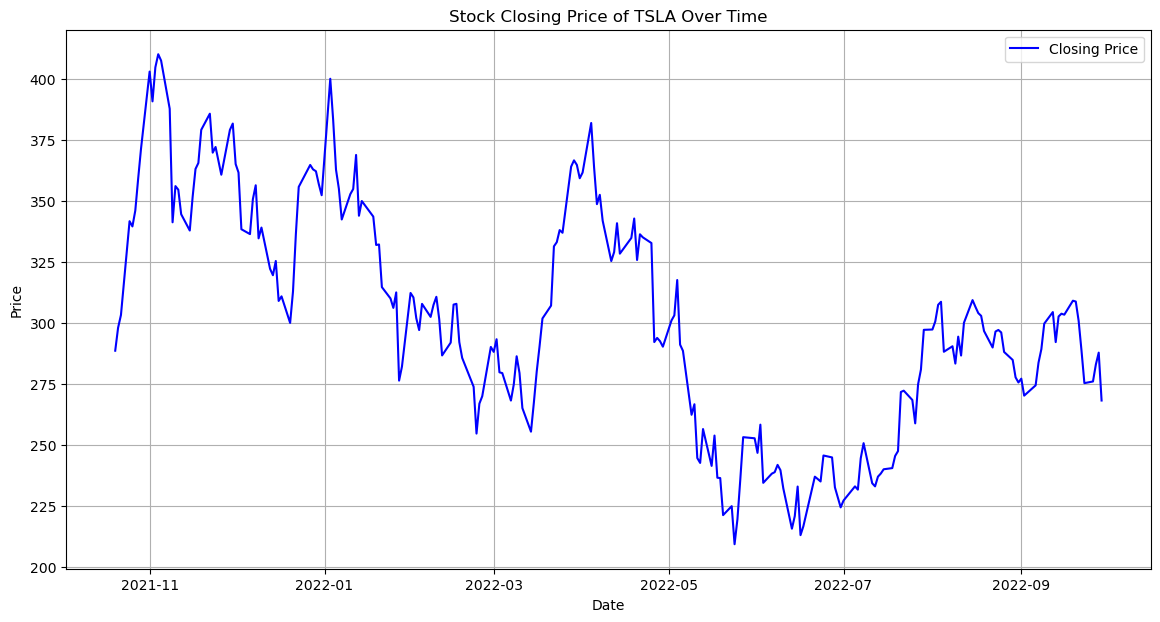

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', color='blue')
plt.title(f"Stock Closing Price of {ticker} Over Time")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

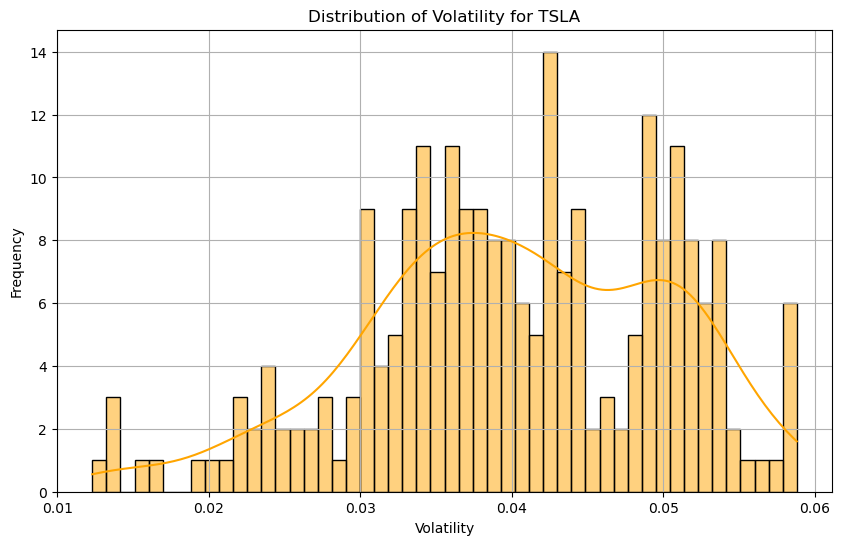

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['Volatility'], bins=50, kde=True, color='orange')
plt.title(f"Distribution of Volatility for {ticker}")
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

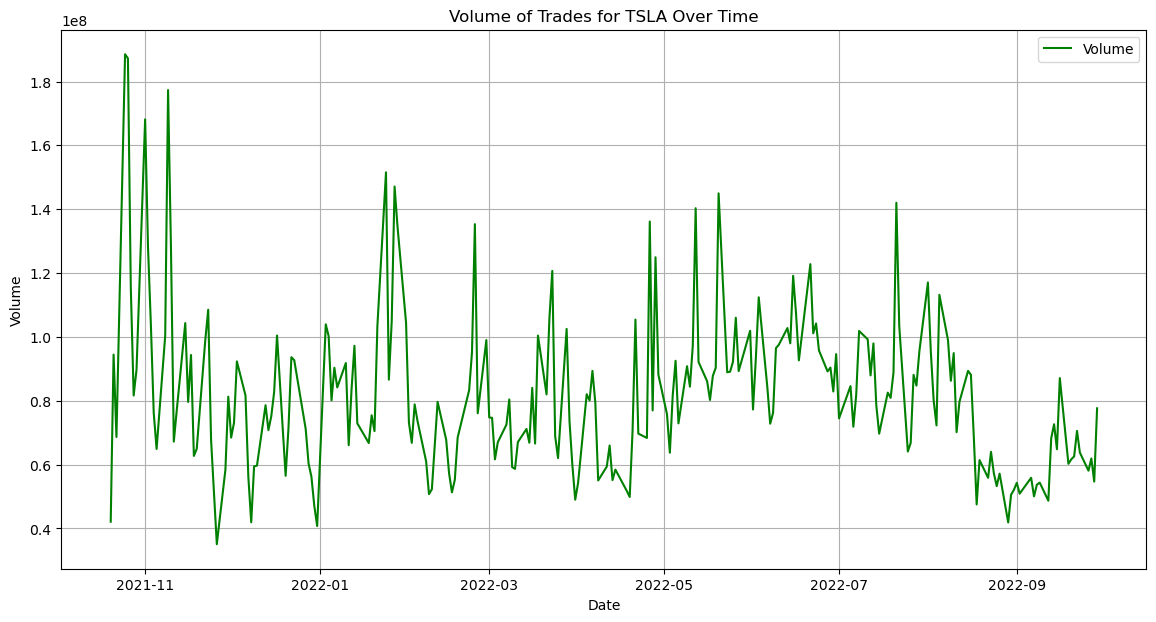

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Volume'], label='Volume', color='green')
plt.title(f"Volume of Trades for {ticker} Over Time")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

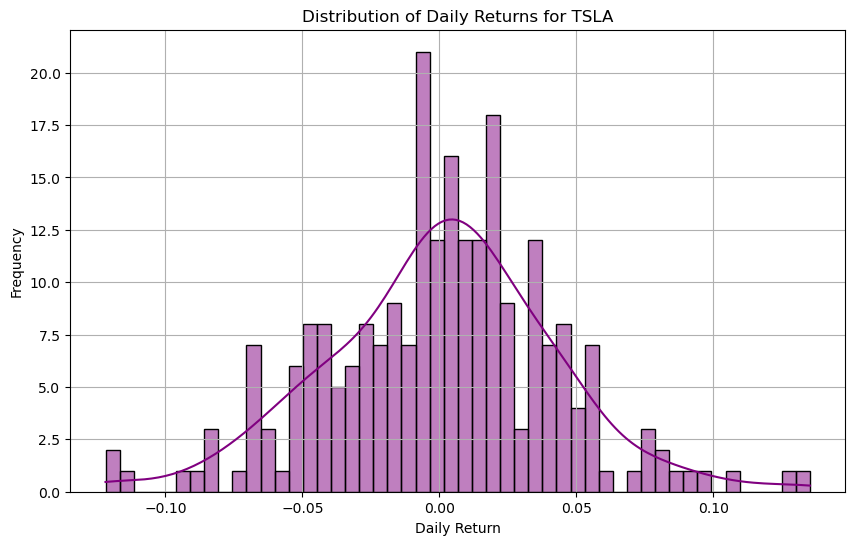

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['Daily Return'], bins=50, kde=True, color='purple')
plt.title(f"Distribution of Daily Returns for {ticker}")
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

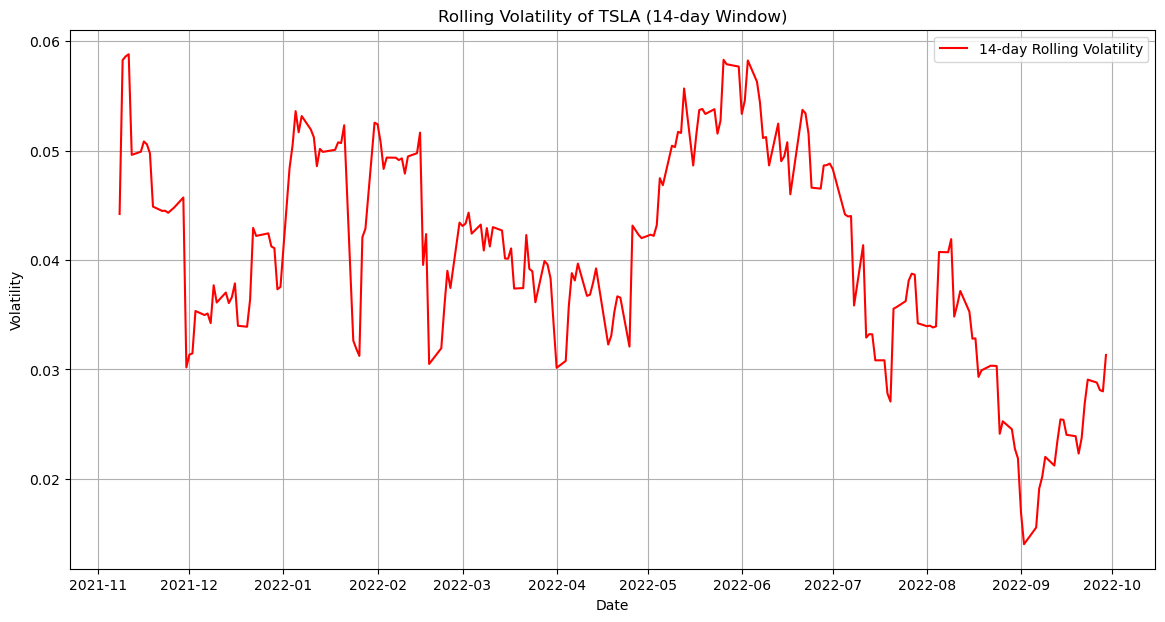

In [ ]:
plt.figure(figsize=(14, 7))
stock_data['Rolling Volatility'] = stock_data['Daily Return'].rolling(window=14).std()
plt.plot(stock_data.index, stock_data['Rolling Volatility'], label='14-day Rolling Volatility', color='red')
plt.title(f"Rolling Volatility of {ticker} (14-day Window)")
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

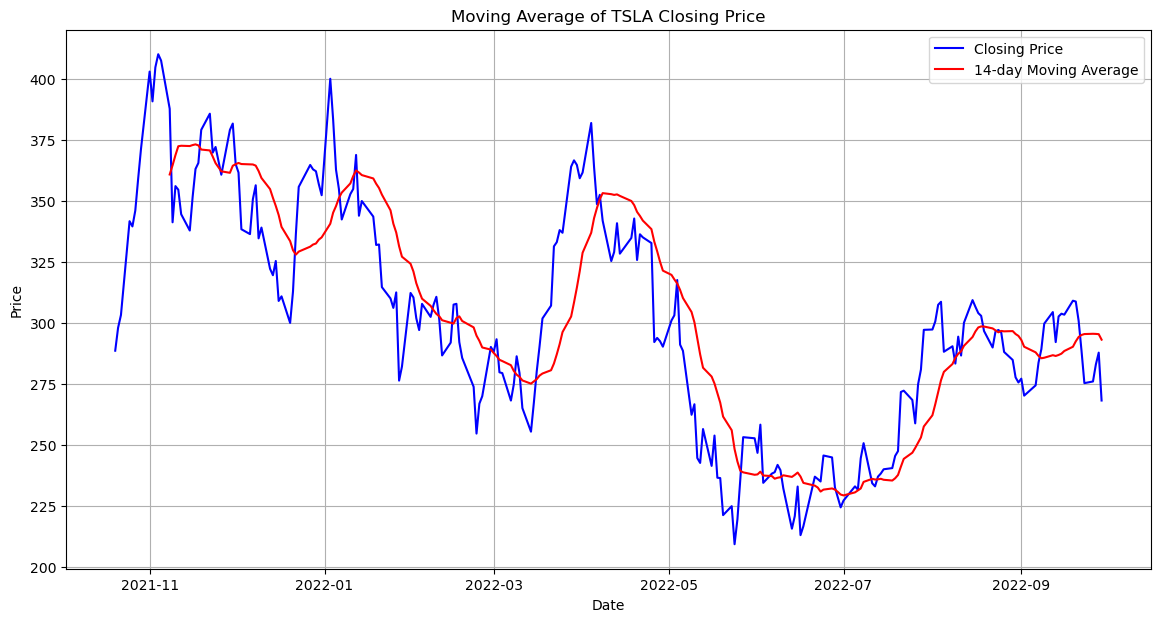

In [ ]:
plt.figure(figsize=(14, 7))
stock_data['Moving Average'] = stock_data['Close'].rolling(window=14).mean()
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', color='blue')
plt.plot(stock_data.index, stock_data['Moving Average'], label='14-day Moving Average', color='red')
plt.title(f"Moving Average of {ticker} Closing Price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return']]

Price,Open,High,Low,Close,Volume,Daily Return
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2021-10-20,288.450012,289.829987,285.793335,288.600006,42096300,0.001770
2021-10-21,285.333344,300.000000,285.166656,298.000000,94444500,0.032571
2021-10-22,298.500000,303.333344,296.986664,303.226654,68642400,0.017539
2021-10-25,316.843323,348.339996,314.733337,341.619995,188556300,0.126616
2021-10-26,341.563324,364.980011,333.813324,339.476654,187245000,-0.006274
...,...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,63748400,-0.045948
2022-09-26,271.829987,284.089996,270.309998,276.010010,58076900,0.002470


### Feature selection and target variable

In [ ]:
X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return']]
y = stock_data['Volatility']

In [ ]:
stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return']]

Price,Open,High,Low,Close,Volume,Daily Return
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2021-10-20,288.450012,289.829987,285.793335,288.600006,42096300,0.001770
2021-10-21,285.333344,300.000000,285.166656,298.000000,94444500,0.032571
2021-10-22,298.500000,303.333344,296.986664,303.226654,68642400,0.017539
2021-10-25,316.843323,348.339996,314.733337,341.619995,188556300,0.126616
2021-10-26,341.563324,364.980011,333.813324,339.476654,187245000,-0.006274
...,...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,63748400,-0.045948
2022-09-26,271.829987,284.089996,270.309998,276.010010,58076900,0.002470


In [ ]:
X.columns = X.columns.get_level_values(0) if isinstance(X.columns, pd.MultiIndex) else X.columns
X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

In [ ]:
stacking_model = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)],
    final_estimator=LinearRegression()
)

### Evaluate Random Forest

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Evaluation Metrics for Random Forest:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R²): {r2_rf:.4f}")
print("-" * 40)

Evaluation Metrics for Random Forest:
Mean Absolute Error (MAE): 0.0069
Root Mean Squared Error (RMSE): 0.0083
R-squared (R²): 0.2750
----------------------------------------


### Evaluate XGBoost

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("Evaluation Metrics for XGBoost:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"R-squared (R²): {r2_xgb:.4f}")
print("-" * 40)

Evaluation Metrics for XGBoost:
Mean Absolute Error (MAE): 0.0074
Root Mean Squared Error (RMSE): 0.0089
R-squared (R²): 0.1605
----------------------------------------


###  Evaluate LightGBM

In [ ]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 190, number of used features: 6
[LightGBM] [Info] Start training from score 0.040181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor(random_state=42)

In [ ]:
y_pred_lgb = lgb_model.predict(X_test)

In [ ]:
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)
print("Evaluation Metrics for LightGBM:")
print(f"Mean Absolute Error (MAE): {mae_lgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgb:.4f}")
print(f"R-squared (R²): {r2_lgb:.4f}")
print("-" * 40)

Evaluation Metrics for LightGBM:
Mean Absolute Error (MAE): 0.0070
Root Mean Squared Error (RMSE): 0.0085
R-squared (R²): 0.2478
----------------------------------------


### Evaluate Stacking Regressor

In [ ]:
stacking_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 190, number of used features: 6
[LightGBM] [Info] Start training from score 0.040181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('lgb', LGBMRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [ ]:
y_pred_stack = stacking_model.predict(X_test)

In [ ]:
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)
print("Evaluation Metrics for Stacking Regressor:")
print(f"Mean Absolute Error (MAE): {mae_stack:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_stack:.4f}")
print(f"R-squared (R²): {r2_stack:.4f}")
print("-" * 40)

Evaluation Metrics for Stacking Regressor:
Mean Absolute Error (MAE): 0.0068
Root Mean Squared Error (RMSE): 0.0083
R-squared (R²): 0.2855
----------------------------------------


## Compare Models

In [ ]:
model_comparison = {
    "Model": ["Random Forest", "XGBoost", "LightGBM", "Stacking Regressor"],
    "MAE": [mae_rf, mae_xgb, mae_lgb, mae_stack],
    "RMSE": [rmse_rf, rmse_xgb, rmse_lgb, rmse_stack],
    "R²": [r2_rf, r2_xgb, r2_lgb, r2_stack]
}

In [ ]:
comparison_df = pd.DataFrame(model_comparison)

In [ ]:
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                Model       MAE      RMSE        R²
0       Random Forest  0.006931  0.008313  0.274952
1             XGBoost  0.007388  0.008945  0.160505
2            LightGBM  0.007014  0.008467  0.247827
3  Stacking Regressor  0.006808  0.008253  0.285496


In [ ]:
best_model = stacking_model

In [ ]:
joblib.dump(best_model, 'best_model_volatility.pkl', protocol=2)

['best_model_volatility.pkl']

In [ ]:
best_model = joblib.load('best_model_volatility.pkl')

In [ ]:
input_data = [[0.12, 0.05, 0.02, 0.01, 0.02, 0.03]]

In [ ]:
volatility_prediction = best_model.predict(input_data)

print("Predicted Financial Market Volatility:", volatility_prediction)

Predicted Financial Market Volatility: [0.03714194]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Sentiment Analysis of Social Media Data

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Data Loading

In [ ]:
data = pd.read_csv("stock_tweets.csv")

In [ ]:
print("Original Dataset:")
data.head()

Original Dataset:


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [ ]:
tsla_data = data[data["Stock Name"] == "TSLA"]

In [ ]:
tsla_data.reset_index(drop=True, inplace=True)

In [ ]:
print("\nFiltered Dataset (Only TSLA):")
tsla_data.head()


Filtered Dataset (Only TSLA):


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [ ]:
tsla_data.shape

(37422, 4)

## Data Preprocessing

#### Text Cleaning

In [ ]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = text.lower()
    return text

In [ ]:
tsla_data['Cleaned_Tweet'] = tsla_data['Tweet'].apply(clean_text)

C:\Users\User\AppData\Local\Temp\ipykernel_10044\3357723728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_data['Cleaned_Tweet'] = tsla_data['Tweet'].apply(clean_text)


#### Tokenization

In [ ]:
tsla_data['Tokens'] = tsla_data['Cleaned_Tweet'].apply(word_tokenize)

C:\Users\User\AppData\Local\Temp\ipykernel_10044\2056988686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_data['Tokens'] = tsla_data['Cleaned_Tweet'].apply(word_tokenize)


#### Remove Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

tsla_data['Tokens_No_Stopwords'] = tsla_data['Tokens'].apply(remove_stopwords)

C:\Users\User\AppData\Local\Temp\ipykernel_10044\141684121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_data['Tokens_No_Stopwords'] = tsla_data['Tokens'].apply(remove_stopwords)


#### Stemming

In [ ]:
ps = PorterStemmer()

def stem_words(tokens):
    return [ps.stem(word) for word in tokens]

tsla_data['Stemmed_Tokens'] = tsla_data['Tokens_No_Stopwords'].apply(stem_words)

C:\Users\User\AppData\Local\Temp\ipykernel_10044\2660288120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_data['Stemmed_Tokens'] = tsla_data['Tokens_No_Stopwords'].apply(stem_words)


#### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

tsla_data['Lemmatized_Tokens'] = tsla_data['Tokens_No_Stopwords'].apply(lemmatize_words)

C:\Users\User\AppData\Local\Temp\ipykernel_10044\2323026052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_data['Lemmatized_Tokens'] = tsla_data['Tokens_No_Stopwords'].apply(lemmatize_words)


#### Using TextBlob for Sentiment Scores

In [ ]:
tsla_data['Polarity'] = tsla_data['Cleaned_Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
tsla_data['Subjectivity'] = tsla_data['Cleaned_Tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

C:\Users\User\AppData\Local\Temp\ipykernel_10044\3992972776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_data['Polarity'] = tsla_data['Cleaned_Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\User\AppData\Local\Temp\ipykernel_10044\3992972776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_data['Subjectivity'] = tsla_data['Cleaned_Tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


### Using VADER for Sentiment Scores

In [ ]:
sid = SentimentIntensityAnalyzer()
tsla_data['VADER_Sentiment'] = tsla_data['Cleaned_Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

C:\Users\User\AppData\Local\Temp\ipykernel_10044\4264847157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_data['VADER_Sentiment'] = tsla_data['Cleaned_Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])


In [ ]:
def label_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
tsla_data['Sentiment_Label'] = tsla_data['VADER_Sentiment'].apply(label_sentiment)

C:\Users\User\AppData\Local\Temp\ipykernel_10044\2465692145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_data['Sentiment_Label'] = tsla_data['VADER_Sentiment'].apply(label_sentiment)


### Wordcloud

In [ ]:
positive_tweets = " ".join(tsla_data[tsla_data['Sentiment_Label'] == 'Positive']['Cleaned_Tweet'])
negative_tweets = " ".join(tsla_data[tsla_data['Sentiment_Label'] == 'Negative']['Cleaned_Tweet'])
neutral_tweets = " ".join(tsla_data[tsla_data['Sentiment_Label'] == 'Neutral']['Cleaned_Tweet'])

#### Generate Word Cloud for Positive Tweets

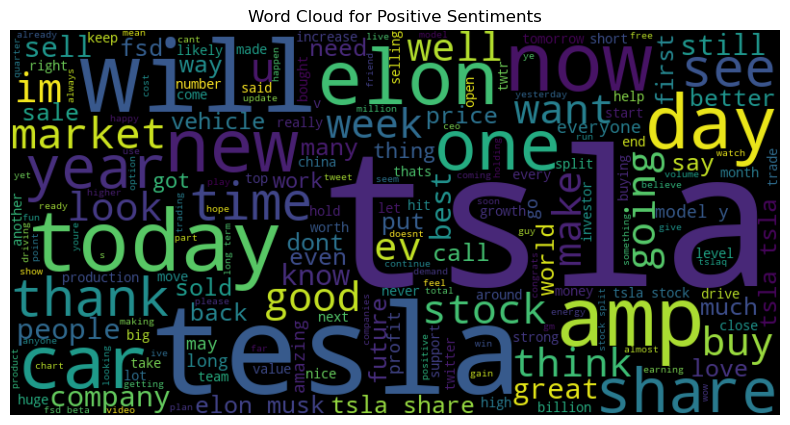

In [ ]:
positive_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiments")
plt.show()

#### Generate Word Cloud for Negative Tweets

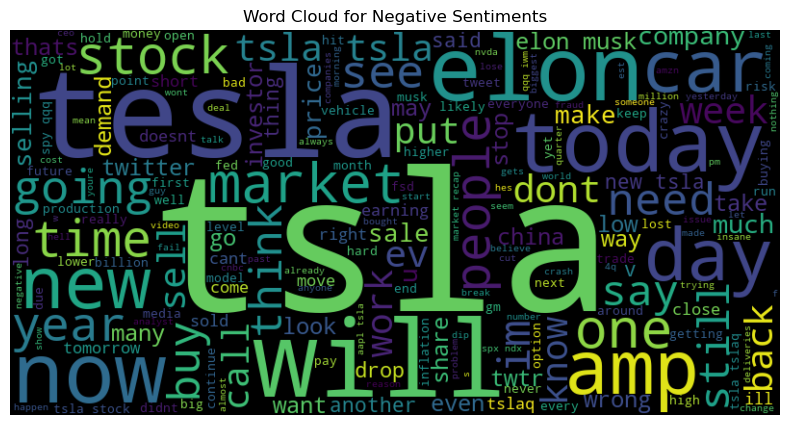

In [ ]:
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Sentiments")
plt.show()

#### Generate Word Cloud for Neutral Tweets

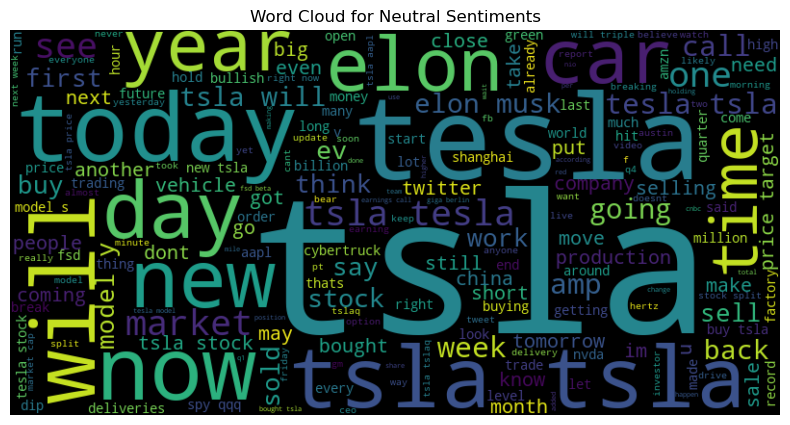

In [ ]:
neutral_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Neutral Sentiments")
plt.show()

In [ ]:
print("\nProcessed Dataset:")
tsla_data[['Date', 'Cleaned_Tweet', 'Sentiment_Label', 'Polarity', 'VADER_Sentiment']].head()


Processed Dataset:


,Date,Cleaned_Tweet,Sentiment_Label,Polarity,VADER_Sentiment
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,Positive,0.600000,0.0772
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around 364k fr...,Neutral,0.000000,0.0000
2,2022-09-29 23:18:08+00:00,3 even if i include 630m unvested rsus as of 6...,Positive,0.018182,0.2960
3,2022-09-29 22:40:07+00:00,hahaha why are you still trying to stop tes...,Negative,0.066667,-0.7096
4,2022-09-29 22:27:05+00:00,stop trying to kill kids you sad deranged ol...,Negative,-0.200000,-0.8750


### Bag of Words (BoW) with CountVectorizer

In [ ]:
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(tsla_data['Cleaned_Tweet'])

### TF-IDF with TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(tsla_data['Cleaned_Tweet'])

In [ ]:
y = tsla_data['Sentiment_Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.3, random_state=42)

## Advanced Models (BERT and RoBERTa)

#### BERT Model for Sentiment Analysis

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
bert_sentiment_pipeline = pipeline("sentiment-analysis", model=bert_model, tokenizer=bert_tokenizer)

Device set to use 0


In [ ]:
bert_results = bert_sentiment_pipeline(tsla_data['Cleaned_Tweet'][0])
print("TensorFlow BERT Sentiment for first tweet:", bert_results)

TensorFlow BERT Sentiment for first tweet: [{'label': 'LABEL_1', 'score': 0.6114768981933594}]


### RoBERTa Model for Sentiment Analysis

In [ ]:
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = TFRobertaForSequenceClassification.from_pretrained('roberta-base')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [ ]:
roberta_sentiment_pipeline = pipeline("sentiment-analysis", model=roberta_model, tokenizer=roberta_tokenizer)

Device set to use 0


In [ ]:
roberta_results = roberta_sentiment_pipeline(tsla_data['Cleaned_Tweet'][0])
print("TensorFlow RoBERTa Sentiment for first tweet:", roberta_results)

TensorFlow RoBERTa Sentiment for first tweet: [{'label': 'LABEL_0', 'score': 0.5094469785690308}]


### Saving the Best Model

In [ ]:
joblib.dump(roberta_model.get_weights(), 'roberta_model_weights.pkl', protocol=2)

['roberta_model_weights.pkl']

In [ ]:
weights = joblib.load('roberta_model_weights.pkl')

In [ ]:
roberta_model = TFRobertaForSequenceClassification.from_pretrained('roberta-base')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [ ]:
roberta_model.set_weights(weights)

In [ ]:
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
input_text = "Tesla is a great stock!"
inputs = roberta_tokenizer(input_text, return_tensors='tf', padding=True, truncation=True)
prediction = roberta_model(inputs['input_ids'])
logits = prediction.logits
predicted_class = np.argmax(logits.numpy(), axis=1)[0]

In [ ]:
if predicted_class == 0:
    sentiment = "Positive"
elif predicted_class == 1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print("Predicted Sentiment:", sentiment)

Predicted Sentiment: Positive
